# INSIGHT FROM ANALYSIS



---


1. Female students outperform males in reading and writing, with average reading scores of 72.6 and writing scores of 72.4, compared to male averages of 65.5 and 63.4 respectively.  Male students have a slight math advantage (68.8 vs 63.6).

2. Students with Master's degree or Bachelor's degree parents score higher.  For example, math scores average 70 for these groups, compared to ~60 for those with less education.

3. Students with standard lunch score higher in math (69.9) than those with free/reduced lunch (58.9). This disparity is more pronounced in female students.

4. Test preparation course completion significantly boosts scores.  Students completing the course score above 68 in math, reading, and writing on average, compared to below 60 for non-completers.

5.  The test prep benefit is consistent across all parental education levels, with prepared students consistently outperforming unprepared peers regardless of parental background.

6. The gender gap in math (as shown in point 1) is less pronounced among students completing test preparation; although precise difference values are not provided in the code output.

7. Parental education strongly correlates with student performance.  Higher parental education levels are associated with consistently higher scores across all subjects.

8. Lunch type may reflect socioeconomic status impacting scores. Students with standard lunch outperform those with free/reduced lunch.

9. There are noticeable performance disparities between different racial/ethnic groups. The group with "group E" has the highest average scores across all three subjects (math, reading, and writing while the group labeled "group A" has the lowest average scores in all three subjects.




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student =  pd.read_csv('StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# How both gender are perforing across all subjects

In [28]:
gender_performance = student.pivot_table(index='gender', values=['math score', 'reading score', 'writing score'], aggfunc='mean')
gender_performance

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


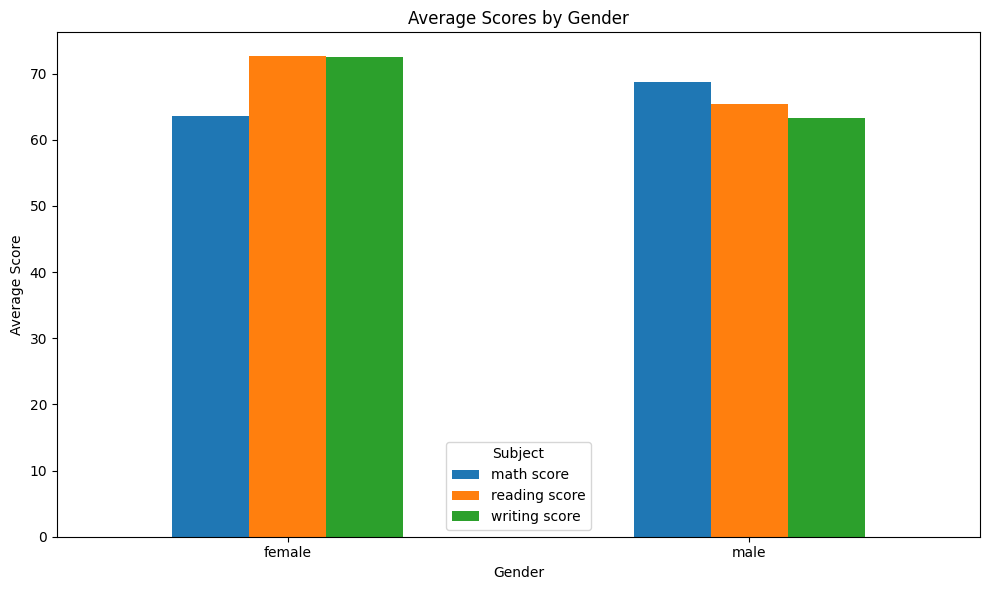

In [29]:

gender_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()


# Does parental level of education influence performance?

<ipython-input-27-151256b5ee2f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
<ipython-input-27-151256b5ee2f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
<ipython-input-27-151256b5ee2f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)


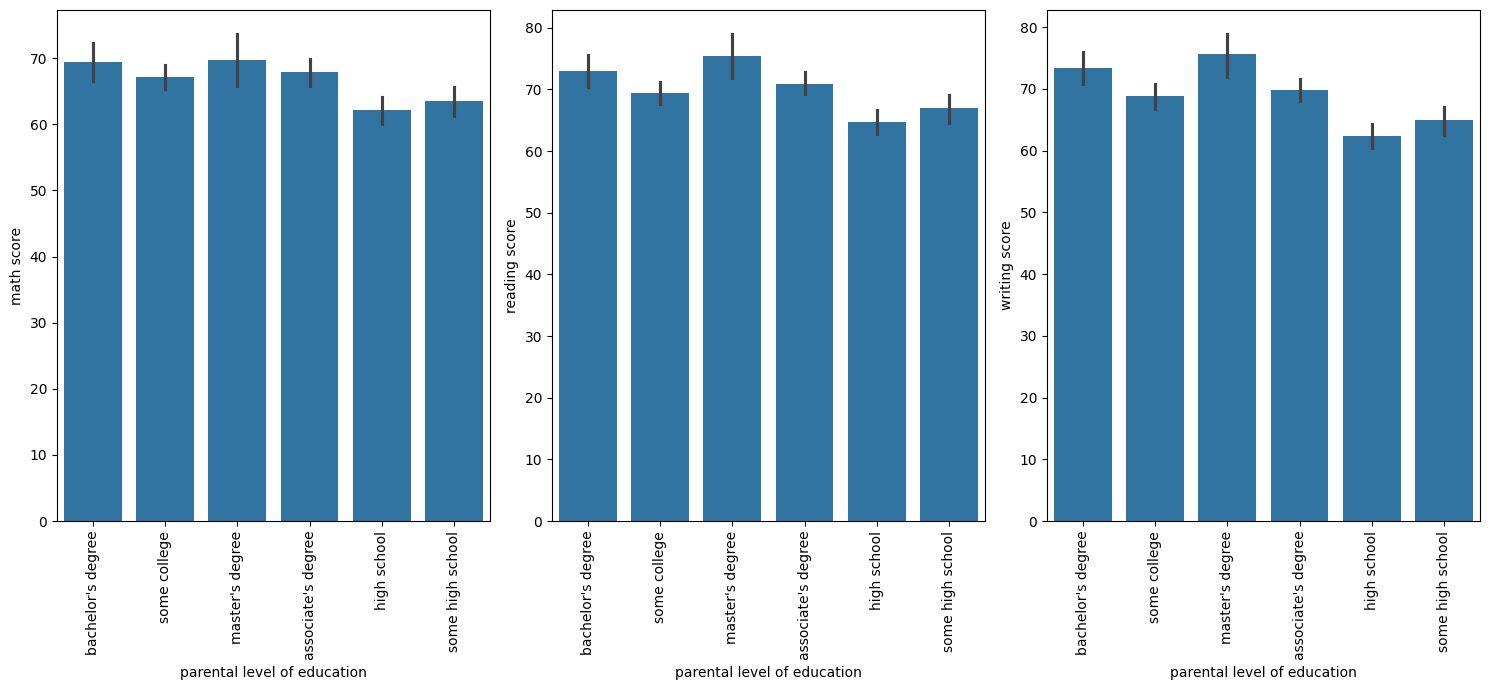

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 7))
sns.barplot(x='parental level of education', y='math score', data=student, ax=ax[0])
sns.barplot(x='parental level of education', y='reading score', data=student, ax=ax[1])
sns.barplot(x='parental level of education', y='writing score', data=student, ax=ax[2])

# Rotate x-axis labels vertically
for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show();


# Influence of lunch on academic performance

In [41]:
student.groupby(['gender', 'lunch'])[['math score', 'writing score', 'reading score']].mean()

math score  writing score  reading score
gender lunch                                                 
female free/reduced   55.814815      66.444444      67.386243
       standard       68.124620      75.927052      75.607903
male   free/reduced   62.457831      59.126506      61.542169
       standard       72.022152      65.509494      67.537975

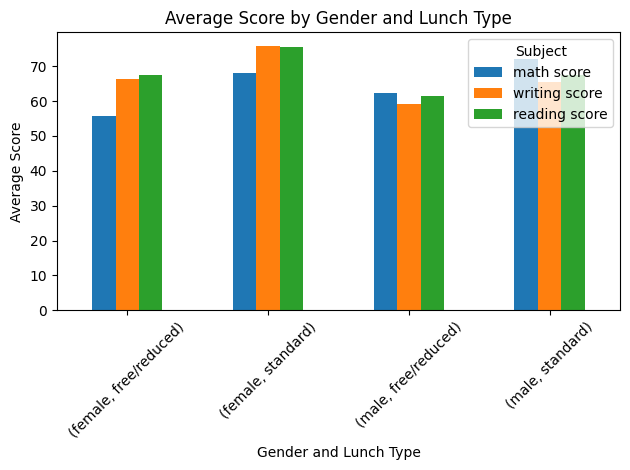

In [45]:


student.groupby(['gender', 'lunch'])[['math score', 'writing score', 'reading score']].mean().plot(kind='bar')
plt.title('Average Score by Gender and Lunch Type')
plt.xlabel('Gender and Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Subject')
plt.show()

# How does test preparation  affect performance

In [35]:
prep_performance = student.pivot_table(index='test preparation course', values=['math score', 'reading score', 'writing score'], aggfunc='mean')
prep_performance

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


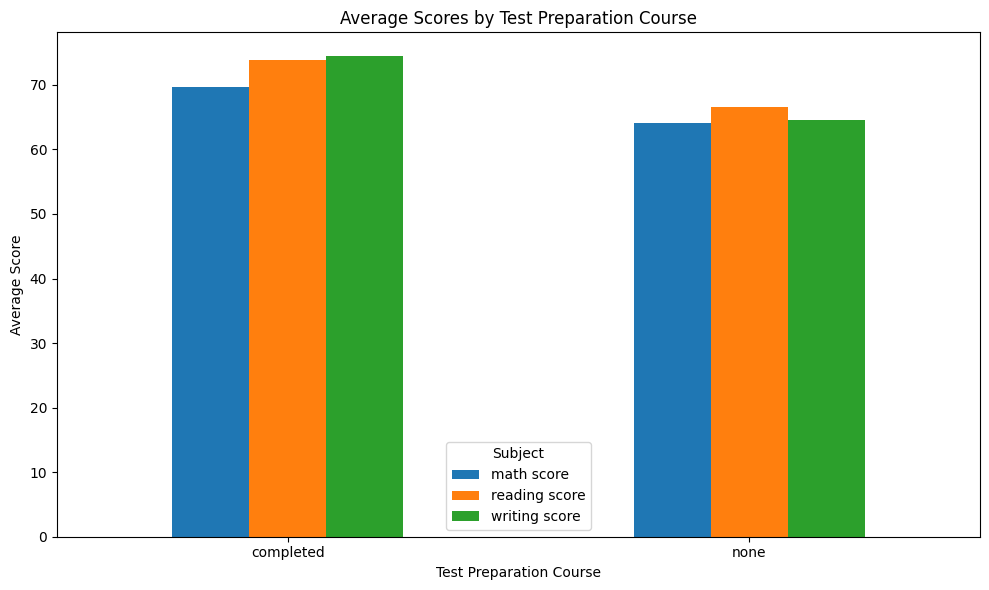

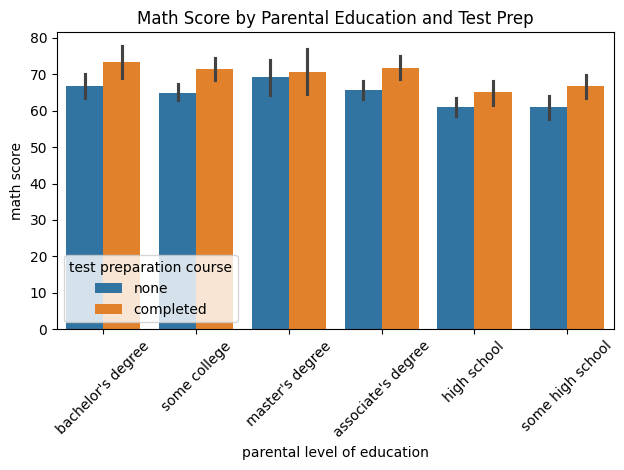

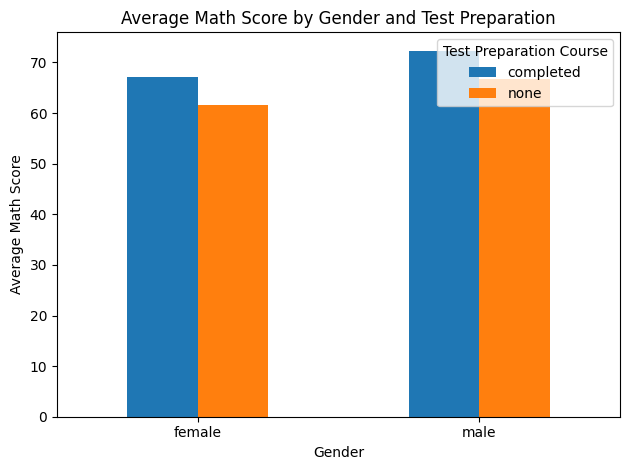

In [36]:

# Bar plot visualization of test preparation course impact
prep_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

# --- Further analysis combining test preparation with other factors ---
# Example:  Impact of test preparation and parental education on math scores
sns.barplot(x='parental level of education', y='math score', hue='test preparation course', data=student)
plt.title('Math Score by Parental Education and Test Prep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Example: Test preparation course impact broken down by gender
gender_prep_math = student.groupby(['gender', 'test preparation course'])['math score'].mean().unstack()
gender_prep_math.plot(kind='bar')
plt.title('Average Math Score by Gender and Test Preparation')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.legend(title='Test Preparation Course')
plt.tight_layout()
plt.show()


                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


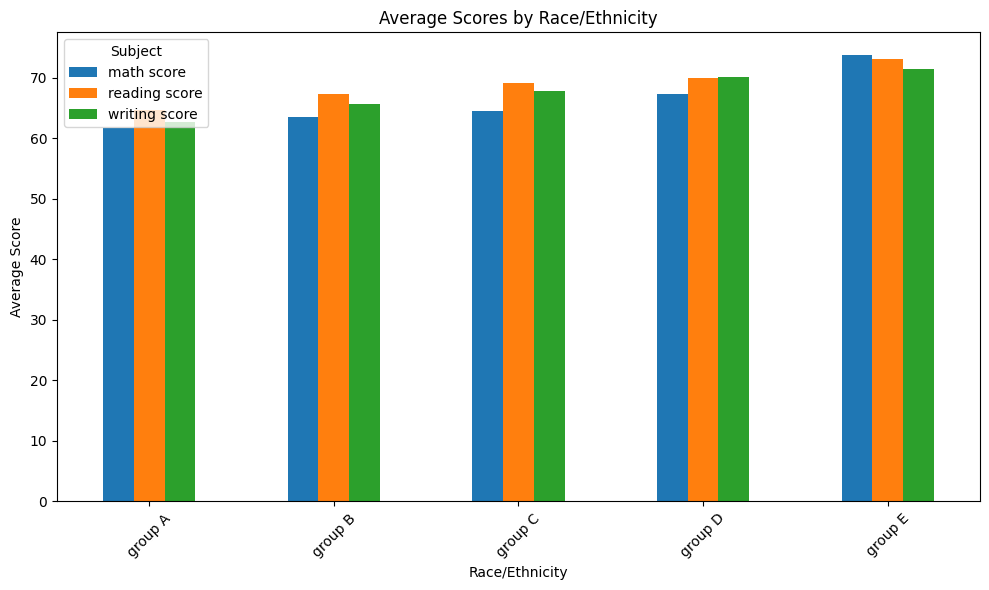

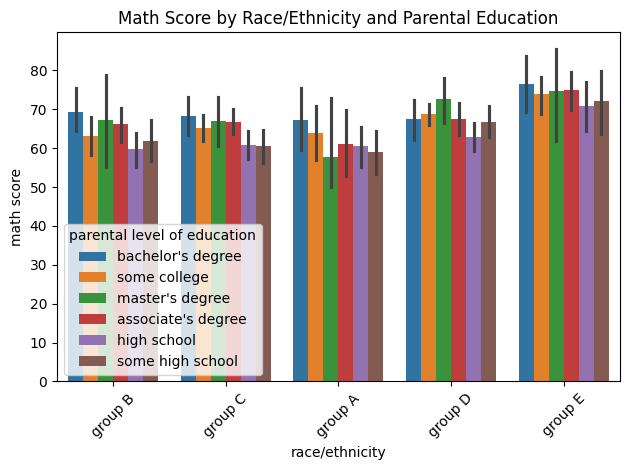

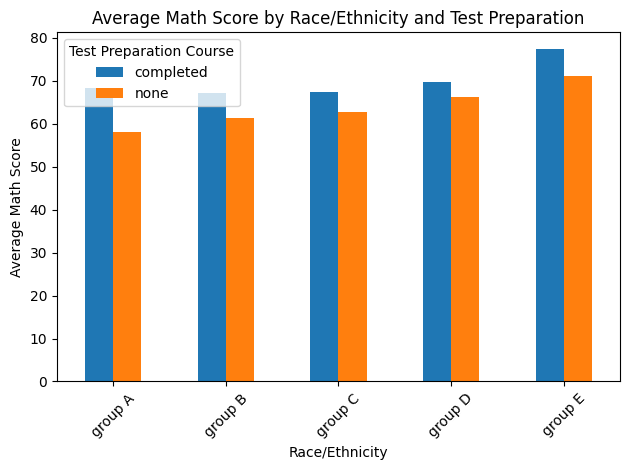

In [47]:
# Analyze performance based on race/ethnicity
race_performance = student.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(race_performance)

race_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

#Further analysis combining race with other factors
# Example: Impact of race and parental education on math scores
sns.barplot(x='race/ethnicity', y='math score', hue='parental level of education', data=student)
plt.title('Math Score by Race/Ethnicity and Parental Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example: Test preparation course impact broken down by race
race_prep_math = student.groupby(['race/ethnicity', 'test preparation course'])['math score'].mean().unstack()
race_prep_math.plot(kind='bar')
plt.title('Average Math Score by Race/Ethnicity and Test Preparation')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Math Score')
plt.xticks(rotation=45)
plt.legend(title='Test Preparation Course')
plt.tight_layout()
plt.show()


                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


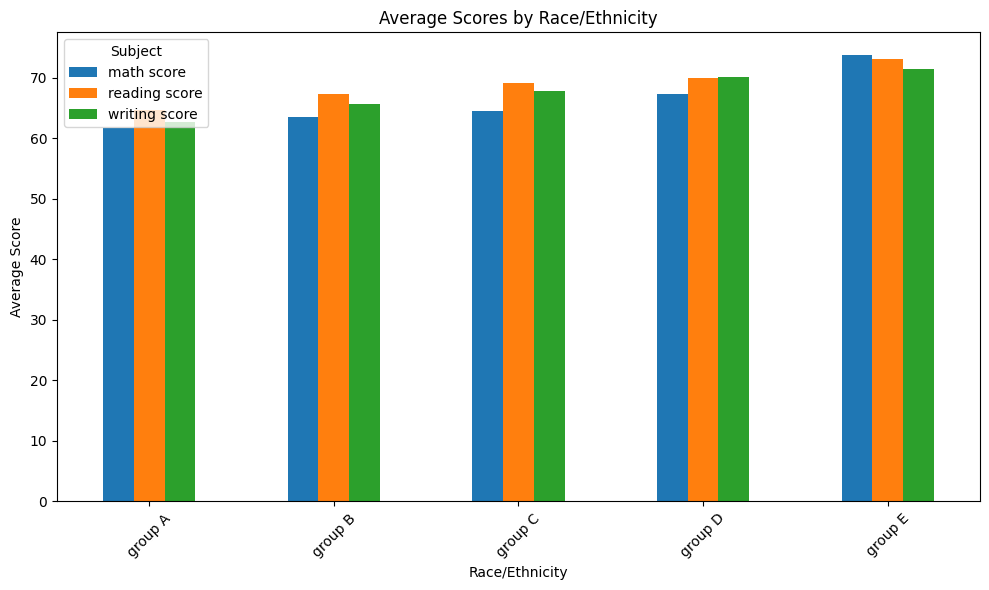

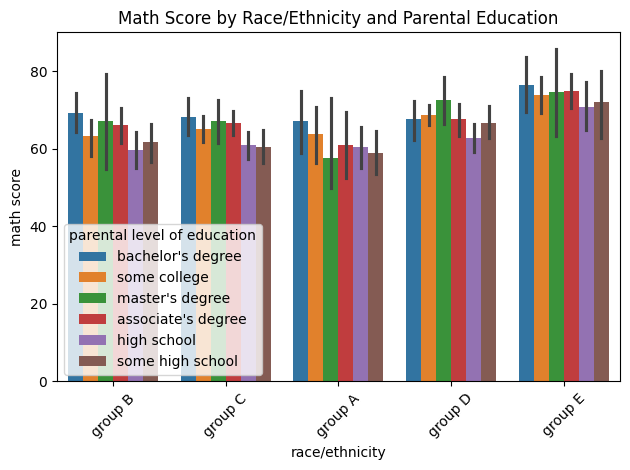

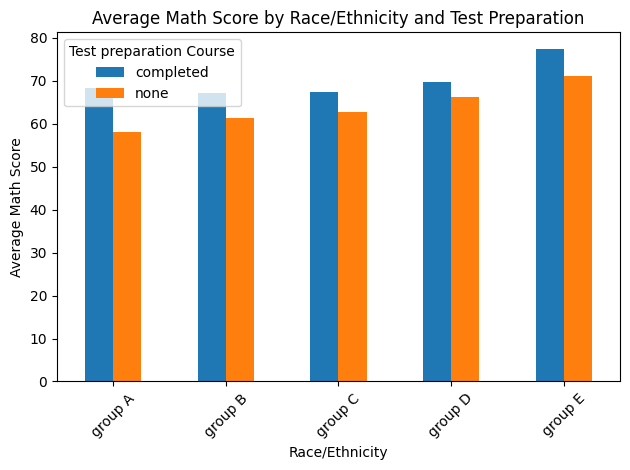

In [48]:
# Analyze performance based on race/ethnicity
race_performance = student.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
race_performance
